<a href="https://colab.research.google.com/github/paulc00/ML-Intro/blob/master/notebooks/solutions/2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

We'll perform a logistic regression to try and classify breast tumors as benign or malignant based on features identified from biopsies.


## Technical setup
First we load packages we'll be using

In [0]:
# Import numpy for linear algebra operations
import numpy as np

# Import pandas for data manipulation
import pandas as pd  

# Import the functions we'll need from scikit-learn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Import the Data

In [0]:
breast_cancer_dataset = load_breast_cancer()

## Investigate the Data

We'll perform some EDA here. First we take a look at the data structure that's been passed in. We'll print the contents of the dataset object.


In [4]:
print(dir(breast_cancer_dataset))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']



We note that there is a DESCR attribute in the data structure so we can try printing that out. It gives us lots of useful information about our data.

In [5]:
print(breast_cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Now we know a little bit about our data we can copy it over to pandas to check correlations between attributes, including the target variable.

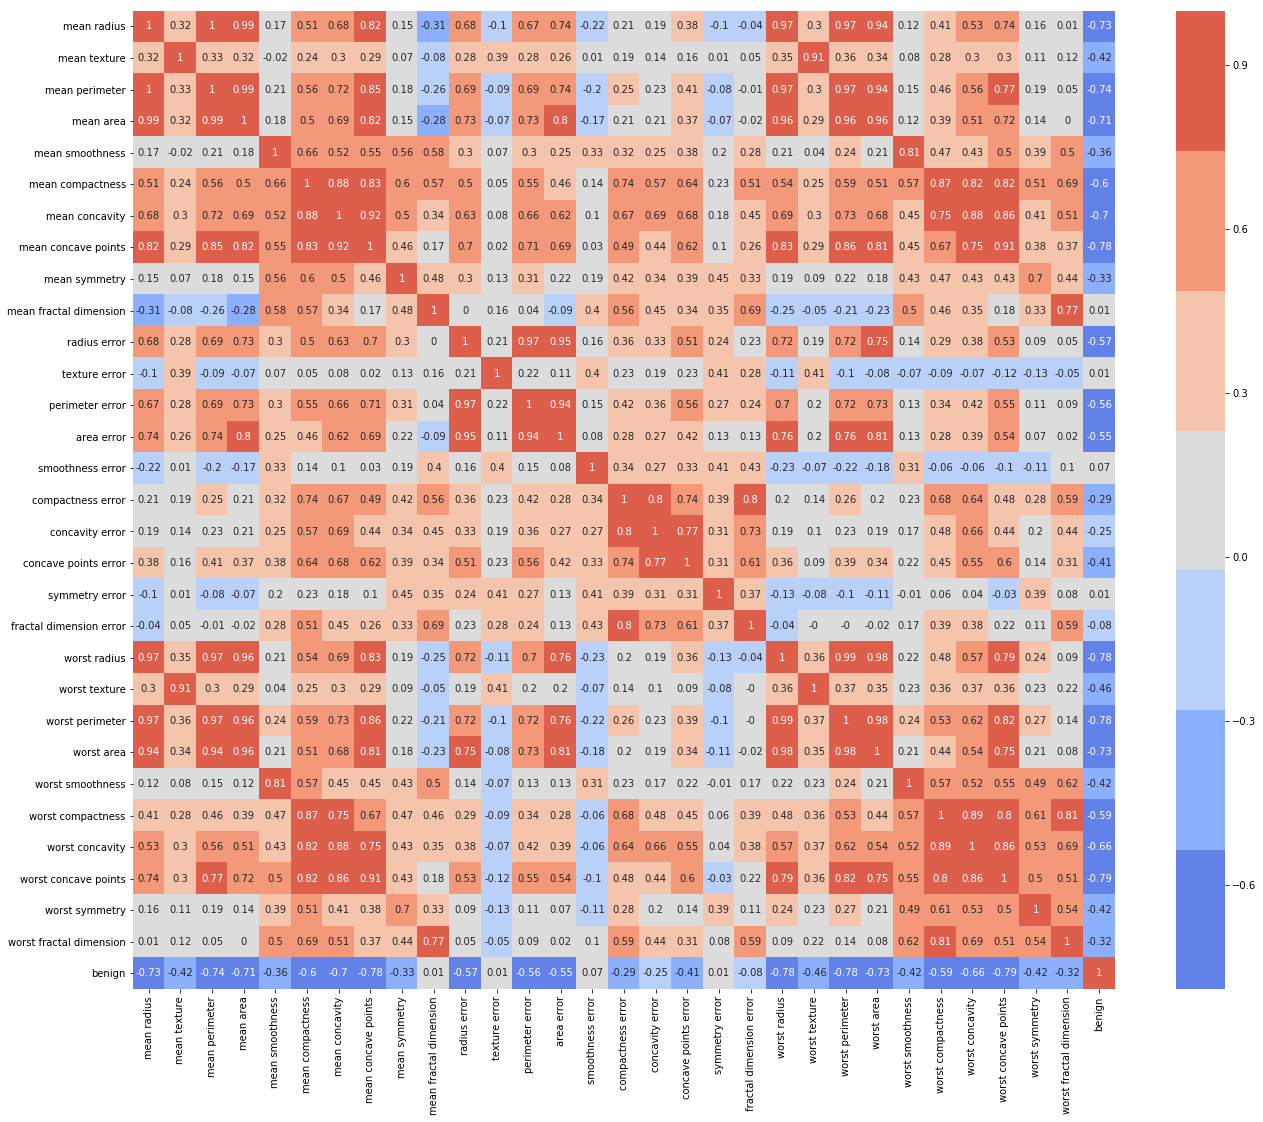

In [6]:
breast_cancer_df =  pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
breast_cancer_df['benign'] = breast_cancer_dataset.target

plt.figure(figsize=(22,18))

# Calculate the correlation matrix which will be correlations between each of the attributes
correlation_matrix = breast_cancer_df.corr().round(2)
# Produce a heatmap showing the correlation matrix
sns.heatmap(data=correlation_matrix, annot=True, cmap=sns.color_palette("coolwarm", 7))


## Prepare the Data

We'll use information from the correlations between our features and our target, `benign`, to eliminate irrelevant features from our dataset.



In [0]:
# correlation_matrix['benign'], get the last row of the correlation matrix
# .iloc[:-1], removing the last column, 'benign'
# .where(lambda x : x < -0.7), for each value, return the value if 
#                              it's less than -0.7 otherwise return NaN
# .notnull(), return False if NaN, True otherwise
corr_support = correlation_matrix['benign']\
                  .iloc[:-1]\
                  .where(lambda x : x < -0.73)\
                  .notnull()
# corr_support = [ True, False,  ...]
# Display the feature selection/elimination from RFE
print('Selected features:')
for feature_name, selected in zip(breast_cancer_dataset.feature_names, corr_support):
  print(f"\t\t   {'+' if selected else '-'} {feature_name}")

Selected features:
		   - mean radius
		   - mean texture
		   + mean perimeter
		   - mean area
		   - mean smoothness
		   - mean compactness
		   - mean concavity
		   + mean concave points
		   - mean symmetry
		   - mean fractal dimension
		   - radius error
		   - texture error
		   - perimeter error
		   - area error
		   - smoothness error
		   - compactness error
		   - concavity error
		   - concave points error
		   - symmetry error
		   - fractal dimension error
		   + worst radius
		   - worst texture
		   + worst perimeter
		   - worst area
		   - worst smoothness
		   - worst compactness
		   - worst concavity
		   + worst concave points
		   - worst symmetry
		   - worst fractal dimension


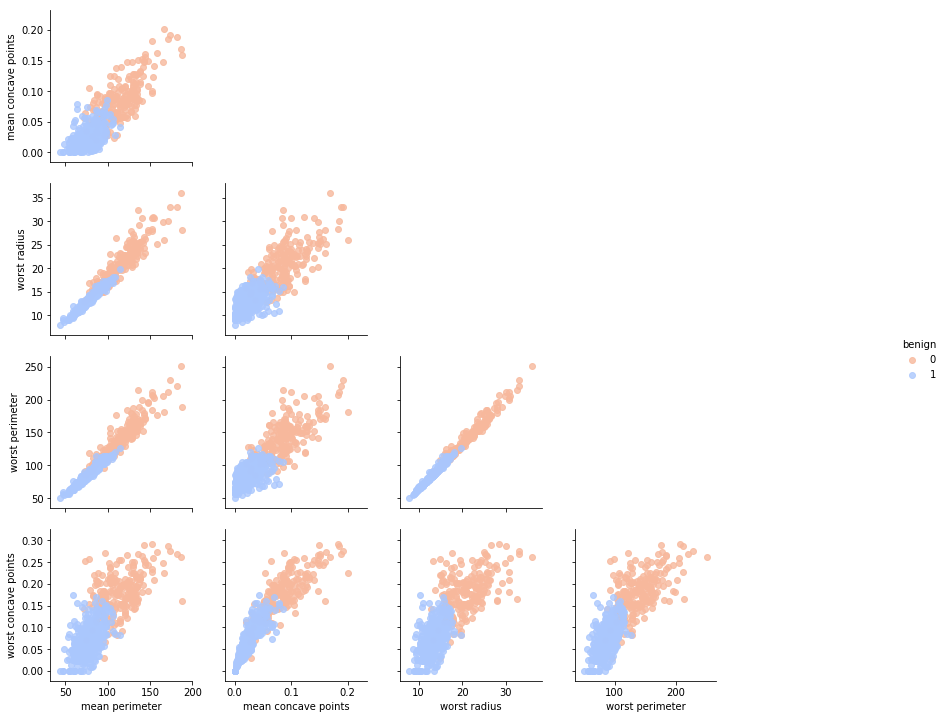

In [0]:
g = sns.PairGrid(breast_cancer_df, vars=breast_cancer_dataset.feature_names[corr_support],
                 hue='benign', palette='coolwarm_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();
for i, j in zip(*np.triu_indices_from(g.axes, 0)):
    g.axes[i, j].set_visible(False)

Once we've identified the best features for our model we can create a dataset with the reduced feature list.

In [0]:
X = pd.DataFrame(breast_cancer_dataset.data[:, corr_support], columns=breast_cancer_dataset.feature_names[corr_support])
y = breast_cancer_dataset.target

We split the dataset into a training set and a test set

In [0]:
# Split our data into training and testing sets using random sampling with 20% of the data as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)  # random_state will cause the same random sequence to be generated every time

jhkhjkjhkhj

In [0]:
logreg = LogisticRegression(solver='lbfgs', penalty='none', max_iter=500, random_state=1)

## Train the Data

Fit our logistic regression model to our data

In [0]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate the Performance of the Model

We'll look at the predictive accuracy on our training set and then on the test set. Remember, we're looking to maximize accuracy on our test data.

We'll also look at the classifiation report from scikit-learn.


The classification report gives us
$$Precision = \frac{True\ Positives}{True\ Positives + False\ Positives}$$
and
$$Recall = \frac{True\ Positives}{True\ Positives + False\ Negatives}$$
and
$$F_1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

**Precision** talks about how precise/accurate your model is out of those predicted positive, how many of the labeled positives were actually positive.

**Recall** calculates how many of the actual positives were properly labeled as positive.

*F1 Score* is a measure of accuracy using precision and recall. It takes the occurance of both false positives and false negatives into account.

A **confusion matrix** shows counts of true negatives, true positives, false negatives and false positives.

![confusion template](http://drive.google.com/uc?export=view&id=11MS9Xw6kQA7jda9hwc2P3Upr7AfvXvV9)

In the following example the data is almost all negatives. Accuracy is 99% but if the false positive represents something very costly like a highly infectious disease or maybe fraud in a business then accuracy useful on its own.

![confusion](http://drive.google.com/uc?export=view&id=1XrSZuW4M0hH98CMbhjTOQoKNGSFu8wdW)

For this example we calculate F1 as follows:

$$
\begin{align}
Precision & = \frac{1}{1} =  1\\
Recall & = \frac{1}{2} = 0.5\\
F_1 & = 2 \times \frac{1 \times 0.5}{ 1 + 0.5} = 2 \times \frac{0.5}{1.5} = 0.66666'
\end{align}
$$

**Support** provides a count of occurences of the true classes. Continuing our example:

$$
Support = \begin{cases}
998, & \text{if }class \text{ is Negative}\\
2, &  \text{if }class \text{ is Positive}
\end{cases}
$$

In [0]:
# Make predictions using training data
y_train_predict = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict)

# Display the training accuracy
print(f'\n\nTraining accuracy = {train_accuracy*100:.3f}%\n')

# Make predictions using test data
y_test_predict = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_predict)

# Display the test accuracy
print(f'Test accuracy = {test_accuracy*100:.3f}%\n\n')

print(classification_report(y_test, y_test_predict, target_names=breast_cancer_dataset.target_names))
print(f'This model will mis-classify about 1 in {1/(1 - test_accuracy):.2f}.')



Training accuracy = 95.824%

Test accuracy = 96.491%


              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        48
      benign       0.96      0.98      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

This model will mis-classify about 1 in 28.50.


Support is fairly balanced. The f1-score is half way between the precision and recall for both classes and it aligns well with our accuracy so the classification report doesn't give us much additional information in this case but it's very useful to know on cases where our data isn't as well balanced or in cases where the type of incorrect predictions is critical to decisions.

96.49% accuracy might sound pretty good but that means that about 1 in 28.5 of these predictions will be incorrect which is OK but probably not accurate enough for a patient or a provider who has to make a critical, high-risk medical decision based on this information. Every fraction of a percentage point we can gain as we approach 100% provides greater and greater gains.

# Exercise

The correlation matrix heatmap gave us some useful pointers but there's a few issues. It's comparing individual attributes so it doesn't take into account combined effects of features together. There's only two classes in our target so it's difficult to say when a correlation is meaningful.

We'll pivot into a different approach for preparing our data here. It's a technique called l2 regularization. It works by weakening the effect of already weak features. This 

OK, let's run that process against our breast cancer data:

In [0]:
logreg = LogisticRegression(solver='liblinear', penalty='l2', random_state=1)

Fill in the code beneath each of the comment sections below

In [0]:
# Use corr_support to create the X dataframe (y will stay the same as before) 
# X = 
X = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
y = breast_cancer_dataset.target

# Split X and y into training and test datasets
# X_train, X_test, y_train, y_test = 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)  # random_state will cause the same random sequence to be generated every time

# Train (Fit) your model
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Make predictions using training data
y_train_predict = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict)

# Display the training accuracy
print(f'\n\nTraining accuracy = {train_accuracy*100:.3f}%\n')

# Make predictions using test data
y_test_predict = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_predict)

# Display the test accuracy
print(f'Test accuracy = {test_accuracy*100:.3f}%\n\n')

print(classification_report(y_test, y_test_predict, target_names=breast_cancer_dataset.target_names))

print(f'This model will mis-classify about 1 in {1/(1 - test_accuracy):.2f}.')



Training accuracy = 95.604%

Test accuracy = 97.368%


              precision    recall  f1-score   support

   malignant       0.98      0.96      0.97        48
      benign       0.97      0.98      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

This model will mis-classify about 1 in 38.00.
